# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Load Data from PSQL into DataFrame


In [2]:
#install psql "driver"
!pip3 install psycopg2-binary

     |████████████████████████████████| 3.0 MB 5.7 MB/s eta 0:00:01


In [3]:
import psycopg2

In [13]:
#conntect to Postgres DB
conn = psycopg2.connect(dbname="postgres",user="postgres",password="password",host="jrvs-psql",port="5432")

In [16]:
#Read SQL database table into a DataFrame.
retail_df = pd.read_sql_query("select * from retail",conn)

In [17]:
retail_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [18]:
retail_df.info()
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359440e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [19]:
retail_df.sample(10) #randomly show 10 samples of dataset

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
918244,570718,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-10-12 10:36:00,8.50,12518.0,Germany
980948,575623,23275,SET OF 3 HANGING OWLS OLLIE BEAK,12,2011-11-10 13:14:00,1.25,14064.0,United Kingdom
5400,489857,90183C,BLACK DROP EARRINGS W LONG BEADS,1,2009-12-02 14:43:00,3.03,NaN,United Kingdom
687083,550477,84378,SET OF 3 HEART COOKIE CUTTERS,2,2011-04-18 14:01:00,1.25,17338.0,United Kingdom
813779,562153,22563,HAPPY STENCIL CRAFT,24,2011-08-03 11:21:00,1.06,14088.0,United Kingdom
881115,567959,85032D,YULETIDE IMAGES GIFT WRAP SET,12,2011-09-23 09:13:00,0.65,12516.0,Germany
326887,521317,21643,ASSORTED TUTTI FRUTTI MIRROR,12,2010-09-03 12:06:00,1.25,17854.0,United Kingdom
296710,518269,22563,HAPPY STENCIL CRAFT,6,2010-08-05 19:22:00,1.25,16395.0,United Kingdom
967158,574624,22801,ANTIQUE GLASS PEDESTAL BOWL,2,2011-11-06 11:20:00,3.75,17769.0,United Kingdom
364353,524706,20725,LUNCH BAG RED RETROSPOT,37,2010-09-30 12:33:00,5.06,NaN,United Kingdom


# Load CSV into Dataframe
**Data Preperation**

- Read the `data/online_retail_II.csv` file into a DataFrame
- Rename all columns to upper camelcase or snakecase
- Convert/cast all columns to the appropriate data types (e.g. datetime)

In [2]:
#Read csv file into a DataFrame
retail_df = pd.read_csv("data/online_retail_II.csv")
retail_df.head()

#Rename all columns to upper camelcase
retail_df.rename(columns={'Customer ID':'CustomerID'},inplace=True)

#check the data type of each cols first
print(retail_df.dtypes)

#Convert all columns to the appropriate data types
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
CustomerID     float64
Country         object
dtype: object


In [3]:
#check the data type again
print(retail_df.dtypes)

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object


# Total Invoice Amount Distribution


## 1. Calculate the invoice amount.


In [4]:
#Remove the negative values of Quantity and Price from the Dataframe
new_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['Price'] > 0)]

In [7]:
#Add a new column called "Amount" to show the price*quantity of each entry
new_df["Amount"] = new_df["Quantity"] * new_df["Price"]

In [8]:
new_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [9]:
#Show the total amount of each invoice
invoice_amount_df = new_df.groupby("Invoice").sum()
invoice_amount_df

,Quantity,Price,CustomerID,Amount
Invoice,,,,
489434,166,32.65,104680.0,505.30
489435,60,10.50,52340.0,145.80
489436,193,70.88,248482.0,630.33
489437,145,83.45,353326.0,310.75
489438,826,44.05,307734.0,2286.24
...,...,...,...,...
581585,278,37.78,331884.0,329.05
581586,66,20.23,52452.0,339.20
581587,106,62.50,202880.0,267.45


## 2. Draw the distribution of invoice amount with min, max, median, mod, and mean.

In [10]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False) #with the box plot's orientation changed to align it with the histogram 
    ax[1].set_xlabel('Amount')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:0.19
Mean:523.30
Median:304.32
Mode:15.00
Maximum:168469.60



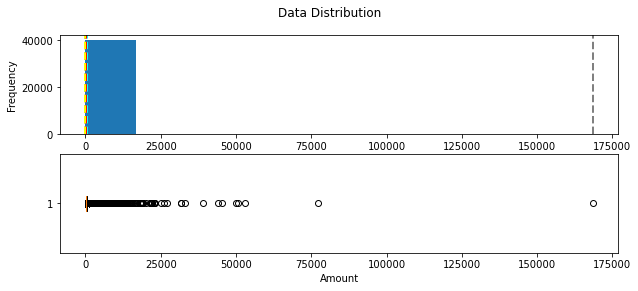

In [11]:
show_distribution(invoice_amount_df["Amount"])

## 3. Draw the distribution for the first 85 quantiles of the invoice amount data with min, max, median, mod, and mean.

In [12]:
#exclude samples that above 85% and remove outlier data
q85 = invoice_amount_df.Amount.quantile(0.85)
remove_outliers_df = invoice_amount_df[invoice_amount_df.Amount < q85]

Minimum:0.19
Mean:271.68
Median:256.24
Mode:15.00
Maximum:724.25



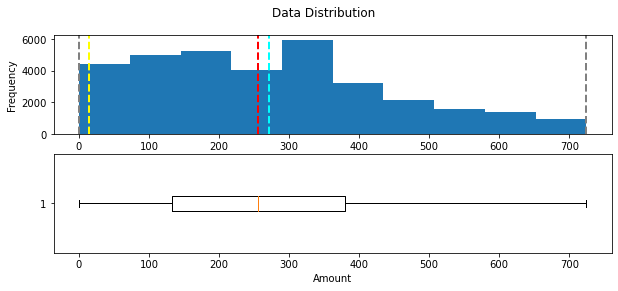

In [13]:
show_distribution(remove_outliers_df["Amount"])

# Monthly Placed and Canceled Orders

In [14]:
#create a new integer column with YYYYMM format
retail_df['YYYYMM'] = retail_df['InvoiceDate'].dt.strftime('%Y%m')
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,YYYYMM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,201112
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,201112
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,201112
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,201112


In [20]:
monthly_canceled_orders_df = retail_df[retail_df.Invoice.str.startswith("C")].groupby("YYYYMM")["Invoice"].nunique()
monthly_canceled_orders_df.name = "Monthly Canceled Orders"
monthly_canceled_orders_df

YYYYMM
200912    401
201001    300
201002    240
201003    407
201004    304
201005    407
201006    357
201007    344
201008    273
201009    371
201010    476
201011    576
201012    326
201101    260
201102    219
201103    318
201104    240
201105    314
201106    329
201107    270
201108    278
201109    333
201110    362
201111    441
201112    146
Name: Monthly Canceled Orders, dtype: int64

In [21]:
total_orders_df = retail_df.groupby("YYYYMM")["Invoice"].nunique()
total_orders_df.name = "Monthly Total Orders"
total_orders_df

YYYYMM
200912    2330
201001    1633
201002    1969
201003    2367
201004    1892
201005    2418
201006    2216
201007    2017
201008    1877
201009    2375
201010    2965
201011    3669
201012    2025
201101    1476
201102    1393
201103    1983
201104    1744
201105    2162
201106    2012
201107    1927
201108    1737
201109    2327
201110    2637
201111    3462
201112    1015
Name: Monthly Total Orders, dtype: int64

In [22]:
monthly_placed_orders_df = total_orders_df - 2 * monthly_canceled_orders_df
monthly_placed_orders_df.name = "Montly Placed Orders"
monthly_placed_orders_df

YYYYMM
200912    1528
201001    1033
201002    1489
201003    1553
201004    1284
201005    1604
201006    1502
201007    1329
201008    1331
201009    1633
201010    2013
201011    2517
201012    1373
201101     956
201102     955
201103    1347
201104    1264
201105    1534
201106    1354
201107    1387
201108    1181
201109    1661
201110    1913
201111    2580
201112     723
Name: Montly Placed Orders, dtype: int64

In [23]:
concat_df = pd.concat([monthly_placed_orders_df,monthly_canceled_orders_df], axis=1)
concat_df

,Montly Placed Orders,Monthly Canceled Orders
YYYYMM,,
200912,1528,401
201001,1033,300
201002,1489,240
201003,1553,407
201004,1284,304
201005,1604,407
201006,1502,357
201007,1329,344
201008,1331,273


<AxesSubplot:xlabel='Invoice Year Month', ylabel='Number of Orders'>

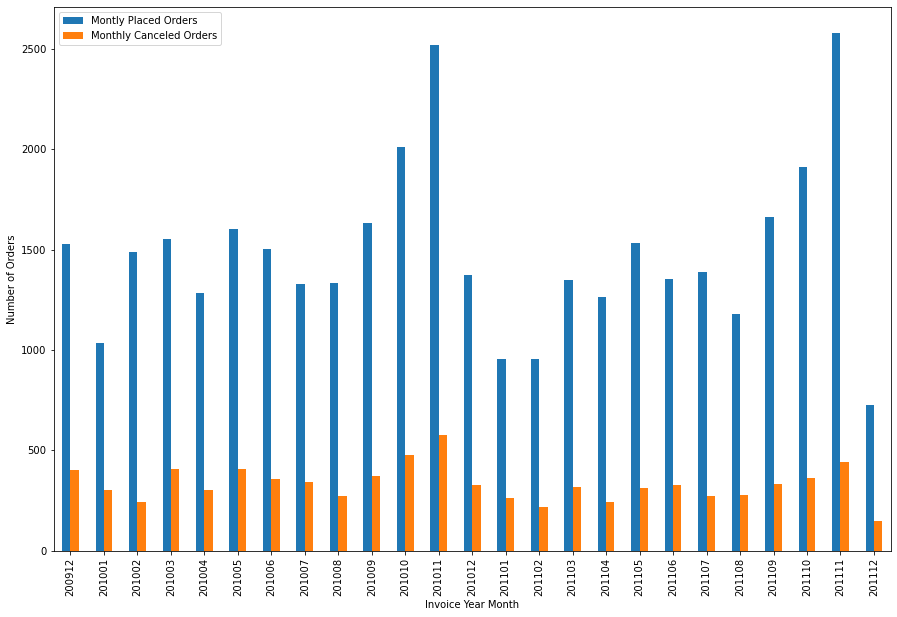

In [24]:
#Plot Placed orders vs Canceled orders
from matplotlib.pyplot import xlabel,ylabel

concat_df.plot(xlabel='Invoice Year Month',ylabel='Number of Orders',kind='bar',figsize=(15,10))

# Monthly Sales

In [25]:
#Add a new column "Amount" to the retial_df,showing the amount for each entry
retail_df["Amount"] = retail_df["Price"] * retail_df["Quantity"]
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,YYYYMM,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [26]:
monthly_sales_df = retail_df.groupby("YYYYMM",as_index=False)["Amount"].sum().rename(columns={'Amount':'MontlyAmount'})
monthly_sales_df

,YYYYMM,MontlyAmount
0,200912,799847.110
1,201001,624032.892
2,201002,533091.426
3,201003,765848.761
4,201004,590580.432
5,201005,615322.830
6,201006,679786.610
7,201007,575236.360
8,201008,656776.340
9,201009,853650.431


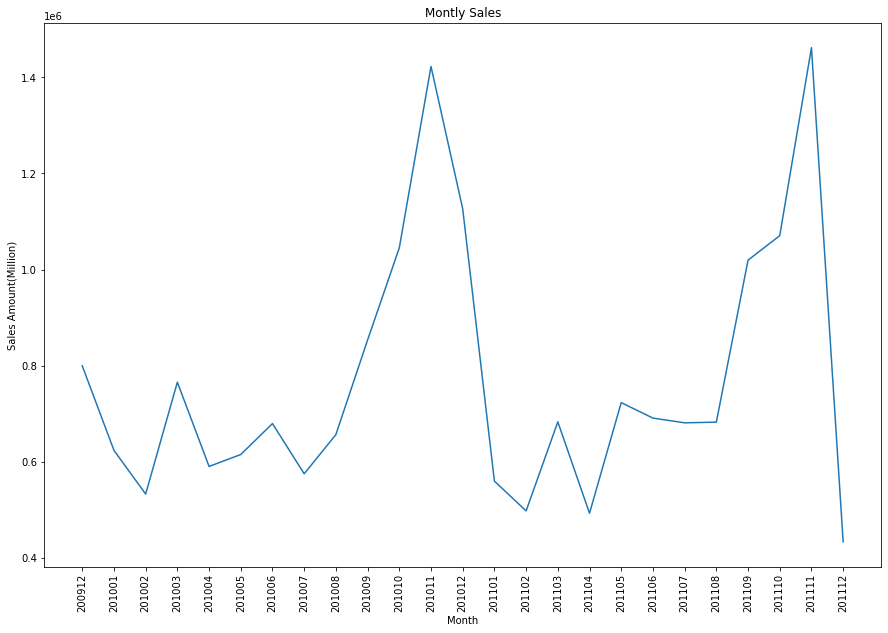

In [27]:
#Plot a chart to show monthly sales

fig = plt.figure(figsize=(15,10))
x=monthly_sales_df.YYYYMM
y=monthly_sales_df.MontlyAmount
plt.plot(x,y)
plt.title('Montly Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount(Million)')
plt.xticks(rotation=90)
plt.show()

# Monthly Sales Growth


In [28]:
#Add a column "Growth" to show the growth percentage of montly sales from last month
monthly_sales_df["Growth"] = monthly_sales_df["MontlyAmount"].pct_change().mul(100).round(2)

In [29]:
monthly_sales_df

,YYYYMM,MontlyAmount,Growth
0,200912,799847.110,NaN
1,201001,624032.892,-21.98
2,201002,533091.426,-14.57
3,201003,765848.761,43.66
4,201004,590580.432,-22.89
5,201005,615322.830,4.19
6,201006,679786.610,10.48
7,201007,575236.360,-15.38
8,201008,656776.340,14.18
9,201009,853650.431,29.98


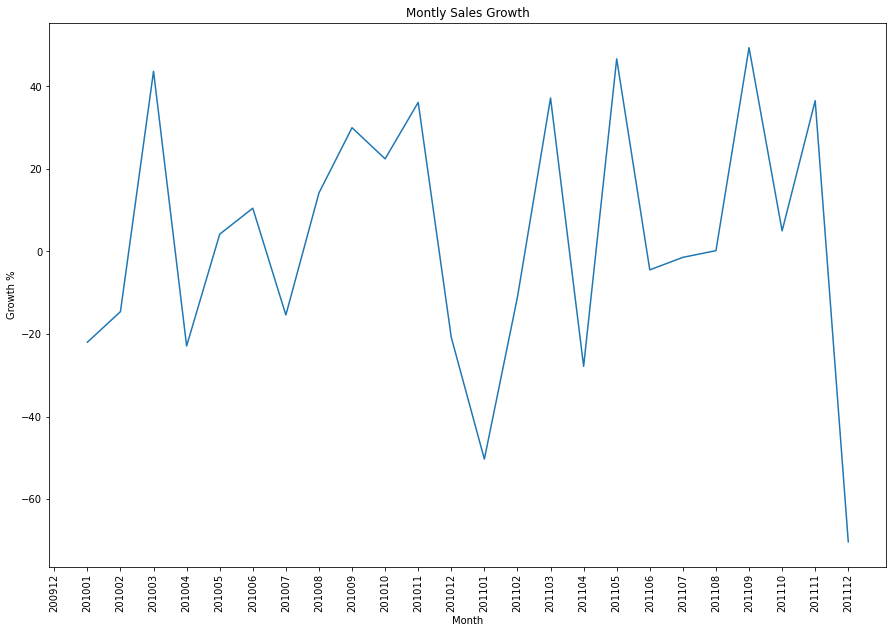

In [30]:
#Plot a chart to show the growth percentage
fig = plt.figure(figsize=(15,10))
x=monthly_sales_df.YYYYMM
y=monthly_sales_df.Growth
plt.plot(x,y)
plt.title('Montly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Growth %')
plt.xticks(rotation=90)
plt.show()

# Monthly Active Users

In [31]:
montly_users_df = retail_df.groupby("YYYYMM",as_index=False)["CustomerID"].nunique().rename(columns={'CustomerID':'NumOfCustomer'})

In [32]:
montly_users_df

,YYYYMM,NumOfCustomer
0,200912,1045
1,201001,786
2,201002,807
3,201003,1111
4,201004,998
5,201005,1062
6,201006,1095
7,201007,988
8,201008,964
9,201009,1202


Text(0, 0.5, '# of Actvie Users')

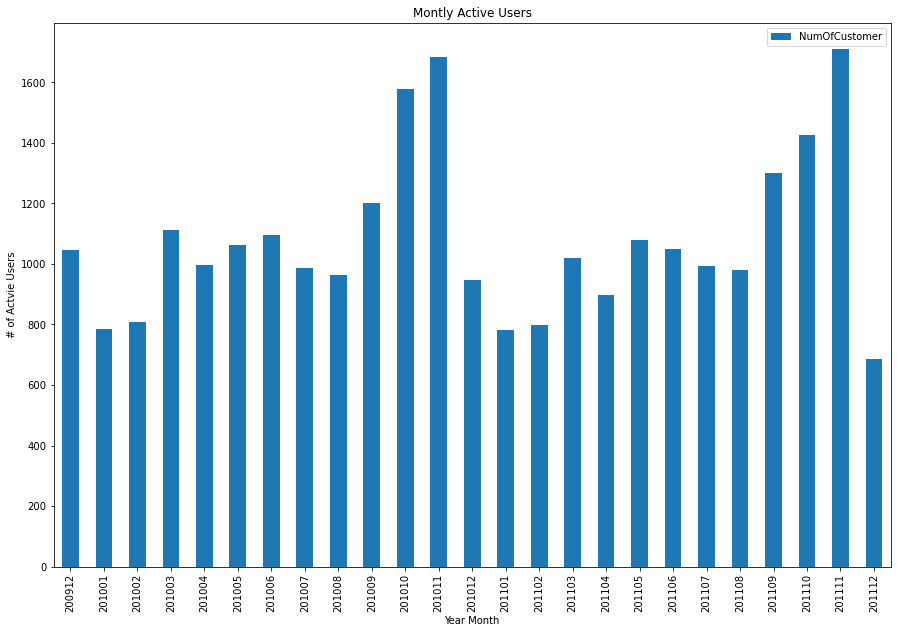

In [35]:
#Plot a bar chart to show # of active users for each month
montly_users_df.plot.bar(x="YYYYMM",y="NumOfCustomer",figsize=(15,10))
plt.title("Montly Active Users")
plt.xlabel("Year Month")
plt.ylabel("# of Actvie Users")

# New and Existing Users



In [36]:
#show the first purchase time of each user
new_user_df = retail_df.groupby("CustomerID",as_index=False)["YYYYMM"].first()
new_user_df

,CustomerID,YYYYMM
0,12346.0,200912
1,12347.0,201010
2,12348.0,201009
3,12349.0,200912
4,12350.0,201102
...,...,...
5937,18283.0,201002
5938,18284.0,201010
5939,18285.0,201002
5940,18286.0,200912


In [37]:
#count the number of new user for each month
new_user_count_df = new_user_df.groupby("YYYYMM",as_index=False)["CustomerID"].count().rename(columns={'CustomerID':'NewUserCount'})
new_user_count_df

,YYYYMM,NewUserCount
0,200912,1045
1,201001,394
2,201002,363
3,201003,436
4,201004,291
5,201005,254
6,201006,269
7,201007,183
8,201008,158
9,201009,242


In [38]:
#count the total number of users per month
user_count_df = retail_df.groupby("YYYYMM",as_index=False)["CustomerID"].nunique().rename(columns={'CustomerID':'UserCount'})
user_count_df

,YYYYMM,UserCount
0,200912,1045
1,201001,786
2,201002,807
3,201003,1111
4,201004,998
5,201005,1062
6,201006,1095
7,201007,988
8,201008,964
9,201009,1202


In [39]:
#merget the above two dataframes
montly_users_df = pd.merge(user_count_df,new_user_count_df,how='left',on="YYYYMM")
montly_users_df

,YYYYMM,UserCount,NewUserCount
0,200912,1045,1045
1,201001,786,394
2,201002,807,363
3,201003,1111,436
4,201004,998,291
5,201005,1062,254
6,201006,1095,269
7,201007,988,183
8,201008,964,158
9,201009,1202,242


In [40]:
#count the number of exsiting users for each month
montly_users_df["ExUserCount"] = montly_users_df["UserCount"] - montly_users_df["NewUserCount"]
montly_users_df

,YYYYMM,UserCount,NewUserCount,ExUserCount
0,200912,1045,1045,0
1,201001,786,394,392
2,201002,807,363,444
3,201003,1111,436,675
4,201004,998,291,707
5,201005,1062,254,808
6,201006,1095,269,826
7,201007,988,183,805
8,201008,964,158,806
9,201009,1202,242,960


<AxesSubplot:xlabel='Year Month', ylabel='# of Users'>

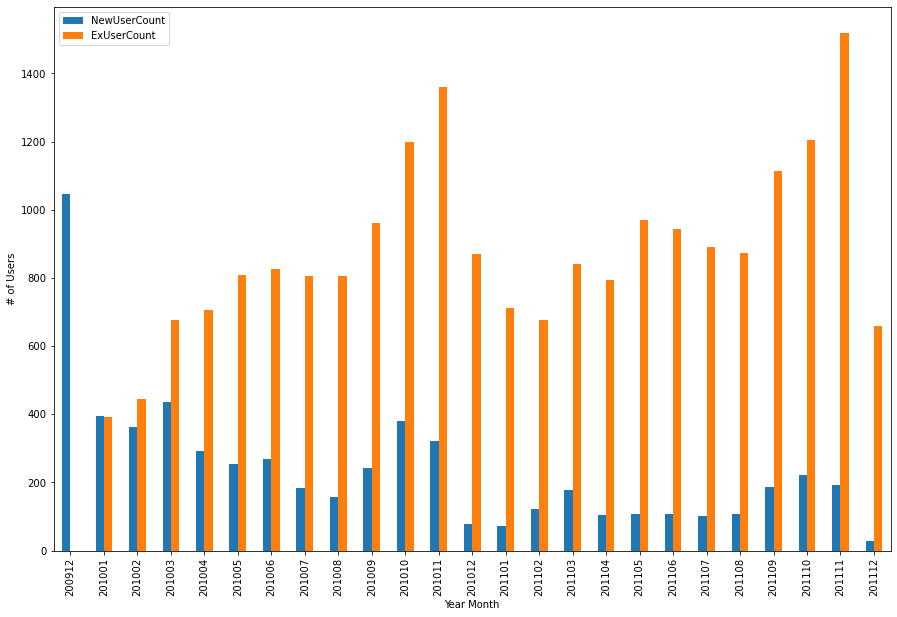

In [41]:
#Plot a diagram to show new and exiting user for each month
montly_users_df.plot(x="YYYYMM",y=["NewUserCount","ExUserCount"],kind='bar',figsize=(15,10),xlabel="Year Month",ylabel="# of Users")

## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.

In [42]:
retail_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,YYYYMM,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,200912,39.6
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,200912,59.5
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,200912,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,200912,45.0


In [43]:
#find the last day of purchase for each customer
rfm_df = retail_df.groupby("CustomerID",as_index=False)["InvoiceDate"].last().rename(columns={'InvoiceDate':'LastInvoiceDate'})
rfm_df

,CustomerID,LastInvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5937,18283.0,2011-12-06 12:02:00
5938,18284.0,2010-10-06 12:31:00
5939,18285.0,2010-02-17 10:24:00
5940,18286.0,2010-08-20 11:57:00


In [44]:
#to make the assessment easier, today's date is set as January 1, 2012.  
today = pd.datetime(2012,1,1) 
today

datetime.datetime(2012, 1, 1, 0, 0)

In [45]:
#Calculate the Recency,Frequency,Monetary Value for each customer
rfm_df["Recency"] =  (today - rfm_df["LastInvoiceDate"]).dt.days

f_df = retail_df.groupby("CustomerID",as_index=False)["Invoice"].nunique().rename(columns={'Invoice':'Frequency'})
rfm_df["Frequency"] = f_df.Frequency

m_df = retail_df.groupby("CustomerID",as_index=False)["Amount"].sum().rename(columns={'Amount':'Monetary'})
rfm_df["Monetary"] = m_df.Monetary

In [46]:
#Delete the "LastInvoiceDate" column
rfm_df = rfm_df.drop(["LastInvoiceDate"],axis=1)
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,347,17,-64.68
1,12347.0,24,8,5633.32
2,12348.0,97,5,2019.40
3,12349.0,40,5,4404.54
4,12350.0,332,1,334.40
...,...,...,...,...
5937,18283.0,25,22,2736.65
5938,18284.0,451,2,436.68
5939,18285.0,682,1,427.00
5940,18286.0,498,3,1188.43


# RFM Segmentation

In [47]:
#RFM score values 
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'],5,labels=[5,4,3,2,1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'],5,labels=[1,2,3,4,5])


In [48]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,347,17,-64.68,2,5,1
1,12347.0,24,8,5633.32,5,4,5
2,12348.0,97,5,2019.40,3,3,4
3,12349.0,40,5,4404.54,5,3,5
4,12350.0,332,1,334.40,2,1,2


In [49]:
#calculation of the RFM score
#RFM score values are combined side by side in str format
rfm_df["RFM_SCORE"] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.0,347,17,-64.68,2,5,1,251
1,12347.0,24,8,5633.32,5,4,5,545
2,12348.0,97,5,2019.40,3,3,4,334
3,12349.0,40,5,4404.54,5,3,5,535
4,12350.0,332,1,334.40,2,1,2,212


In [50]:
#transposition of the RFM table. This makes it easier to evaluate.
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5942.0,15316.500000,1715.451981,12346.00,13831.2500,15316.50,16801.750,18287.00
Recency,5942.0,224.457085,211.881245,22.00,46.0000,117.50,403.000,760.00
Frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00
Monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22


In [51]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [52]:
#creation of segment variable
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True) 
#With "regex = True", we used the names like "need attention", "can't lose" instead of RFM scores to the data set.
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,347,17,-64.68,2,5,1,251,Can't Lose
1,12347.0,24,8,5633.32,5,4,5,545,Champions
2,12348.0,97,5,2019.40,3,3,4,334,Need Attention
3,12349.0,40,5,4404.54,5,3,5,535,Potential Loyalists
4,12350.0,332,1,334.40,2,1,2,212,Hibernating


In [53]:
#grouping the rfm table according to the mean and count values of the segment variable.
rfm_df[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About to Sleep       129.689474   380   1.460526   380    492.810900   380
At Risk              398.094415   752   4.672872   752   1157.449162   752
Can't Lose           343.305882    85  17.717647    85   5725.638494    85
Champions             29.512850   856  23.532710   856  10510.937634   856
Hibernating          487.237785  1535   1.336808  1535    340.030536  1535
Loyal Customers       89.149565  1150  11.941739  1150   3966.024762  1150
Need Attention       135.395604   273   3.673993   273   1099.877403   273
New Customers         31.814815    54   1.000000    54    362.463148    54
Potential Loyalists   46.674764   741   2.967611   741    899.359865   741
Promising             59.758621   116   1.000000   116    322.758966   116